In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [3]:
column=calihouses.feature_names


In [4]:
calidata=pd.DataFrame(calidata,columns=column)
calidata.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
Target=calihouses.target

In [6]:
Target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
Target=pd.DataFrame(Target,columns=['Median_house_val'])

In [8]:
Target

,Median_house_val
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
5,2.697
6,2.992
7,2.414
8,2.267
9,2.611


In [9]:
data=pd.concat([calidata,Target],axis=1)

In [10]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
data.shape

(20640, 9)

In [12]:
data.dtypes

MedInc              float64
HouseAge            float64
AveRooms            float64
AveBedrms           float64
Population          float64
AveOccup            float64
Latitude            float64
Longitude           float64
Median_house_val    float64
dtype: object

In [13]:
data.HouseAge=data.HouseAge.astype('int64')

In [14]:
data.dtypes


MedInc              float64
HouseAge              int64
AveRooms            float64
AveBedrms           float64
Population          float64
AveOccup            float64
Latitude            float64
Longitude           float64
Median_house_val    float64
dtype: object

In [15]:
data.isnull().sum()

MedInc              0
HouseAge            0
AveRooms            0
AveBedrms           0
Population          0
AveOccup            0
Latitude            0
Longitude           0
Median_house_val    0
dtype: int64

In [16]:
data.skew()

MedInc               1.646657
HouseAge             0.060331
AveRooms            20.697869
AveBedrms           31.316956
Population           4.935858
AveOccup            97.639561
Latitude             0.465953
Longitude           -0.297801
Median_house_val     0.977763
dtype: float64

In [17]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [18]:
data.skew()

MedInc              0.226083
HouseAge            0.060331
AveRooms            1.390761
AveBedrms           8.988786
Population         -1.044087
AveOccup            3.879679
Latitude            0.465953
Longitude          -0.297801
Median_house_val    0.275939
dtype: float64

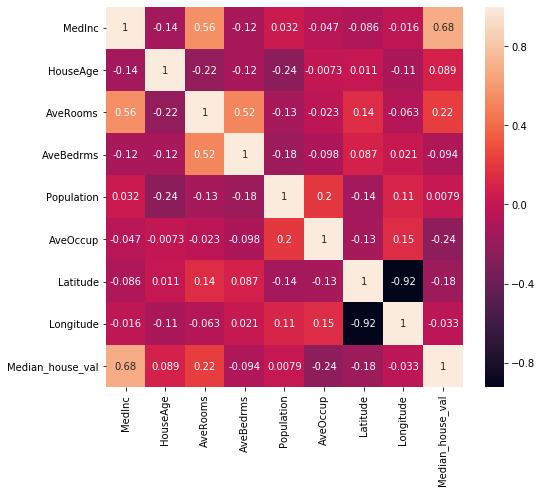

In [19]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True)

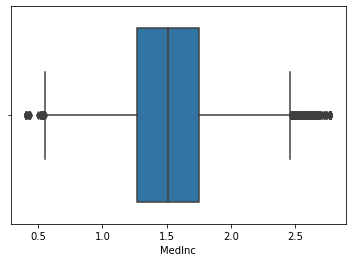

In [20]:
sns.boxplot(data.MedInc)

In [21]:
data=data[(data['MedInc']>0.58) & (data['MedInc']<2.40)]

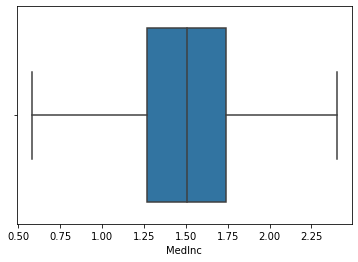

In [22]:
sns.boxplot(data.MedInc)

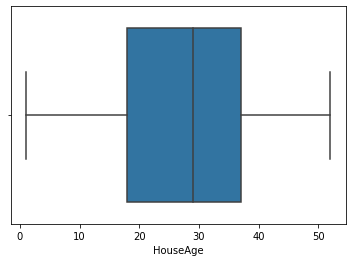

In [23]:
sns.boxplot(data.HouseAge)

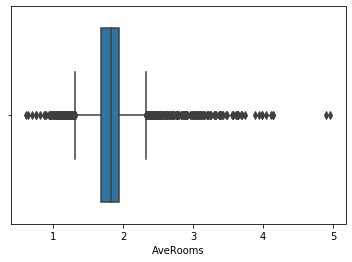

In [24]:
sns.boxplot(data.AveRooms)

In [25]:
data=data[(data['AveRooms']>1.35) & (data['AveRooms']<2.3)]

In [26]:
data.shape

(19656, 9)

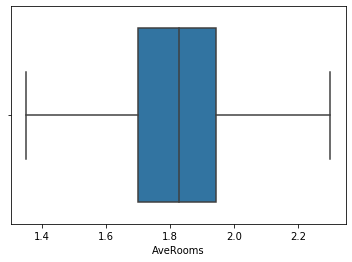

In [27]:
sns.boxplot(data.AveRooms)

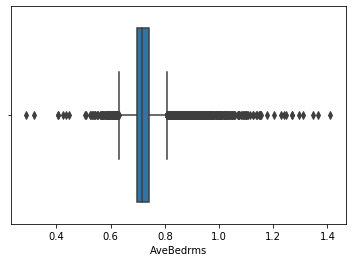

In [28]:
sns.boxplot(data.AveBedrms)

In [29]:
data=data[(data['AveBedrms']>0.637) & (data['AveBedrms']<0.790)]

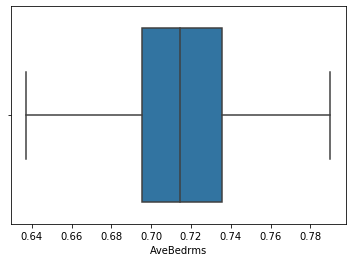

In [30]:
sns.boxplot(data.AveBedrms)

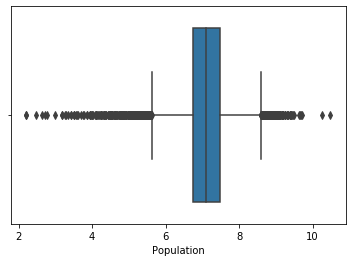

In [31]:
sns.boxplot(data.Population)

In [32]:
data=data[(data['Population']>5.7) & (data['Population']<8.5)]

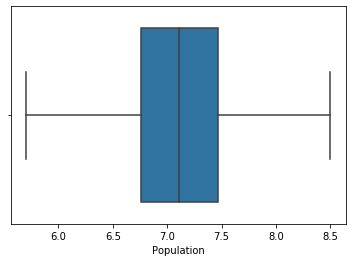

In [33]:
sns.boxplot(data.Population)

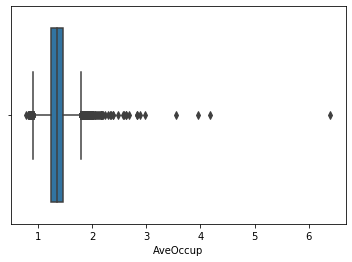

In [34]:
sns.boxplot(data.AveOccup)

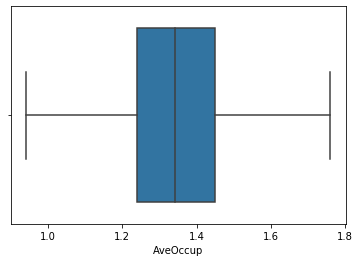

In [35]:
data=data[(data['AveOccup']>0.94) & (data['AveOccup']<1.76)]
sns.boxplot(data.AveOccup)

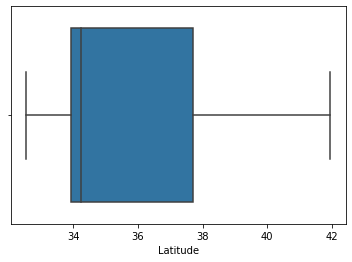

In [36]:
sns.boxplot(data.Latitude)

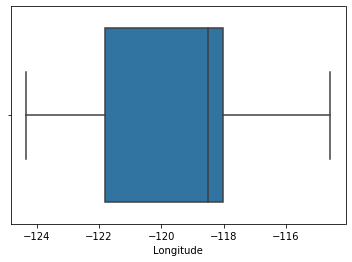

In [37]:
sns.boxplot(data.Longitude)

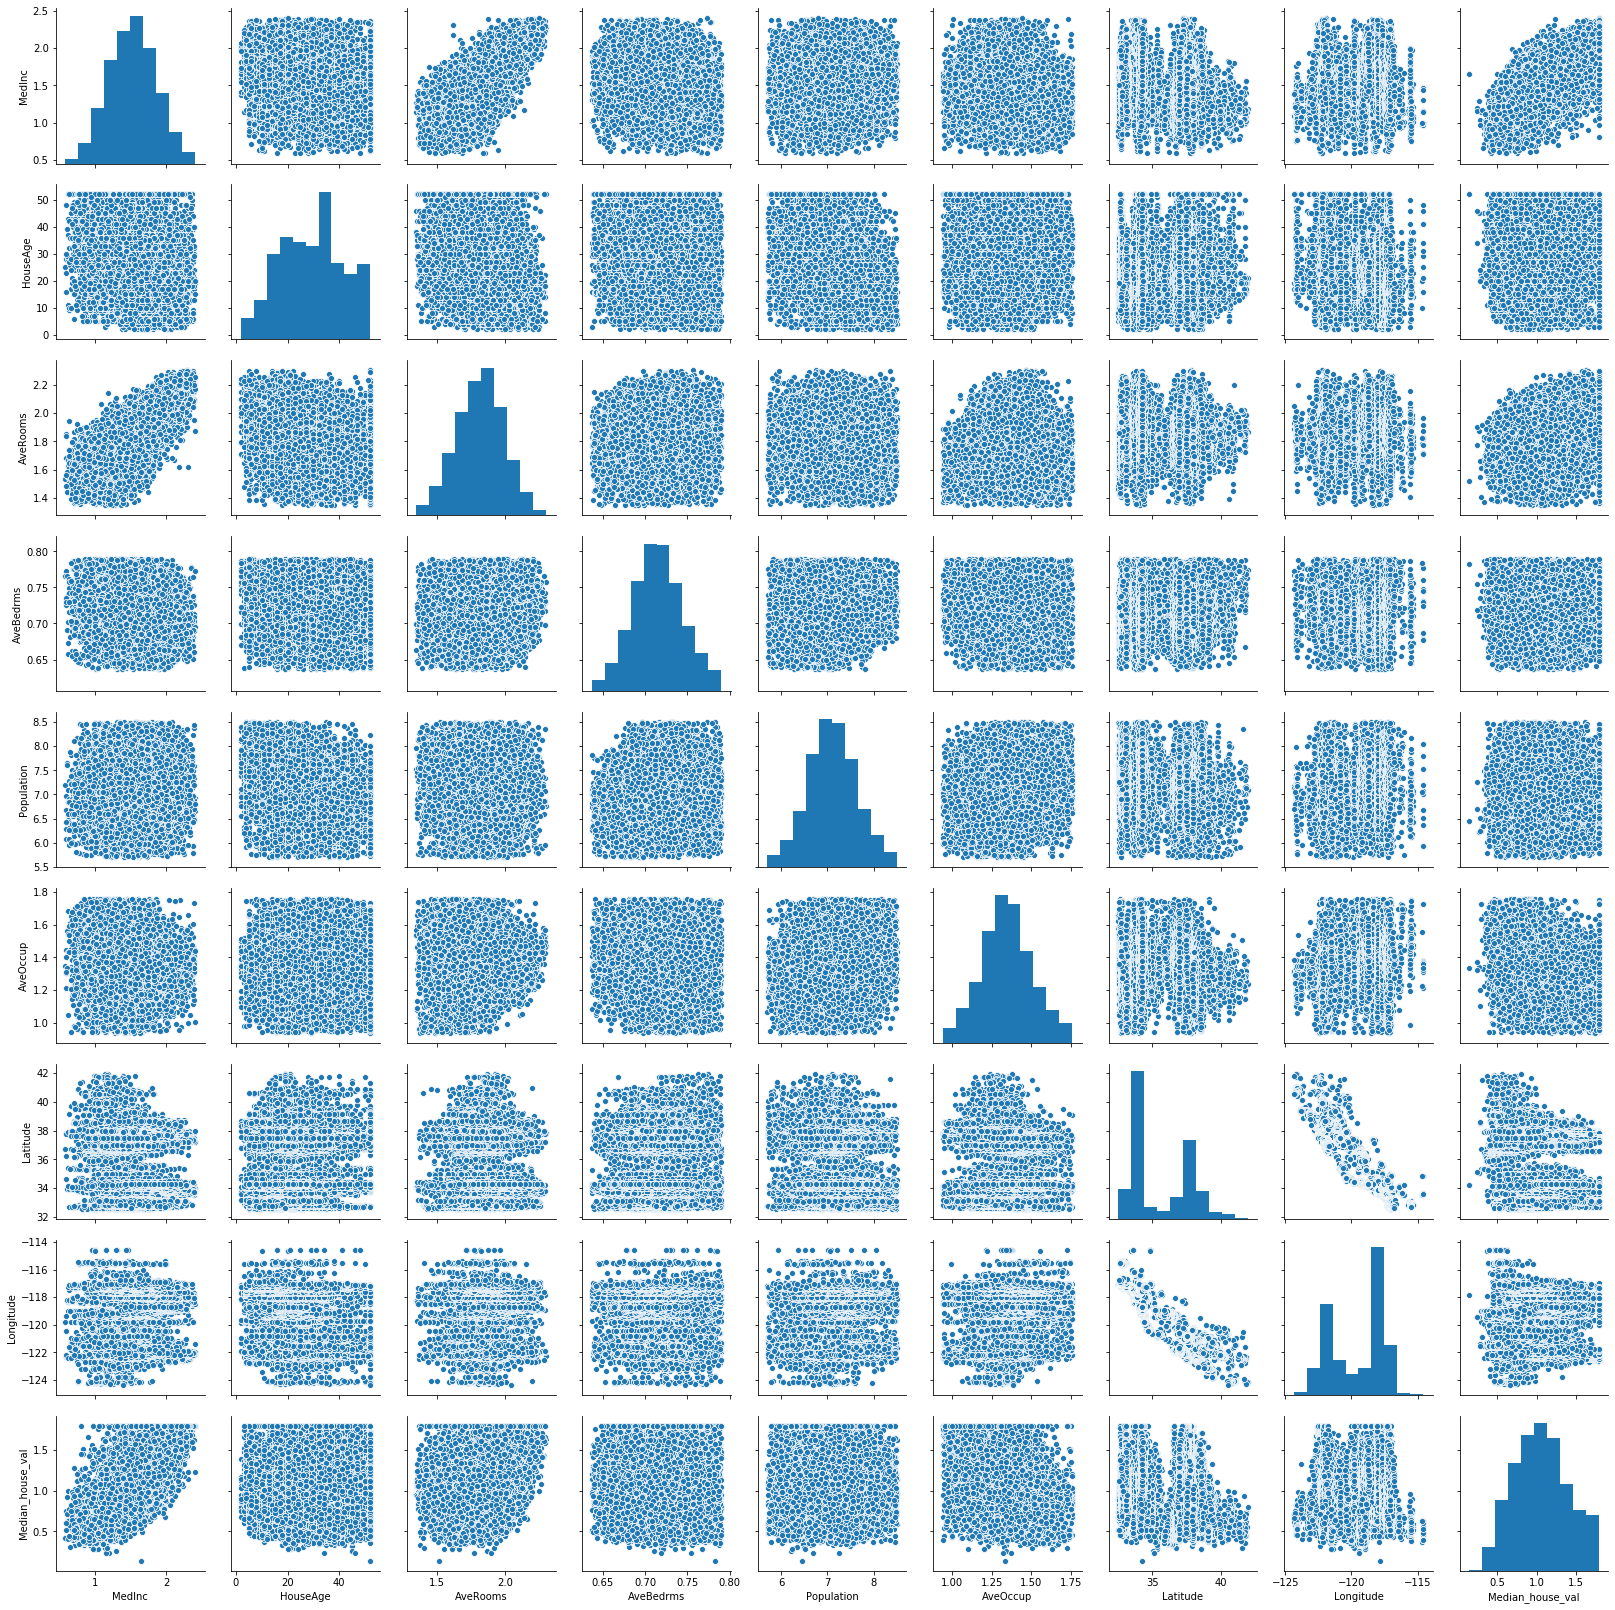

In [38]:
sns.pairplot(data)

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data_tr=sc.fit_transform(data)
data=pd.DataFrame(data_tr,columns=data.columns)

In [40]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_val
0,0.907925,0.78,0.765829,0.444089,0.027584,0.400350,0.567481,0.216991,0.950184
1,0.906515,0.38,0.662552,0.274064,0.744415,0.236892,0.565356,0.218014,0.837185
2,0.840824,1.00,0.925109,0.602579,0.181546,0.482219,0.564293,0.215967,0.828676
3,0.720798,1.00,0.599493,0.601358,0.223547,0.397735,0.564293,0.214944,0.814041
4,0.546780,1.00,0.668892,0.626619,0.227993,0.264681,0.564293,0.214944,0.815274


In [41]:
data.skew()

MedInc              0.005471
HouseAge            0.035600
AveRooms           -0.083567
AveBedrms           0.073991
Population          0.053186
AveOccup            0.113020
Latitude            0.446197
Longitude          -0.302202
Median_house_val    0.214766
dtype: float64

In [42]:
data_in=data.drop('Median_house_val',axis=1)
data_op=data.Median_house_val

In [43]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr=LinearRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.15)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at random state {} r2score is:{}'.format(i,rscore))
    if rscore>max_score:
            max_score=rscore
            final_state=i
print('Max_score is :',max_score,'at',final_state)

at random state 0 r2score is:0.7194711141349184
at random state 1 r2score is:0.7225839877172732
at random state 2 r2score is:0.7295477482812551
at random state 3 r2score is:0.7148491119901211
at random state 4 r2score is:0.7340303349609193
at random state 5 r2score is:0.7067378910025681
at random state 6 r2score is:0.7290189829534781
at random state 7 r2score is:0.7020641530589126
at random state 8 r2score is:0.7341665696485349
at random state 9 r2score is:0.7015733147216829
at random state 10 r2score is:0.7108596003287526
at random state 11 r2score is:0.7220525548775891
at random state 12 r2score is:0.735199392277784
at random state 13 r2score is:0.7229742636269811
at random state 14 r2score is:0.7133193257316193
at random state 15 r2score is:0.7281174033222659
at random state 16 r2score is:0.7196766223558415
at random state 17 r2score is:0.722946410858483
at random state 18 r2score is:0.7128482312863615
at random state 19 r2score is:0.73476726985958
at random state 20 r2score is:0.72

In [45]:
from sklearn.model_selection import cross_val_score as cvs

In [46]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=59,test_size=0.15)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
cv=cvs(lr,data_in,data_op,cv=10,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.7436232618387484
rscore for training data: 0.7191082920705671
Cross val score: [0.6318626  0.68186523 0.59990844 0.50966004 0.72151692 0.65511289
 0.63642658 0.62975816 0.49130973 0.73274503]
Mean cv: 0.6290165628752177


In [47]:
from sklearn.metrics import SCORERS

In [48]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [49]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=40)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [50]:
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,50),'max_depth':range(2,8)}]
grid_search=GridSearchCV(estimator=RFR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [51]:
grid_search.best_params_

{'max_depth': 7, 'random_state': 44}

In [52]:
score=grid_search.best_score_
score

0.7664471162734947

In [53]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=44,max_depth=7)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
train_pred=RFR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
cv=cvs(RFR,data_in,data_op,cv=10,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.7786730392814731
rscore for training data: 0.791441625101821
Cross val score: [0.46631987 0.51637063 0.63488848 0.6184733  0.72441166 0.69123103
 0.43642165 0.51832454 0.22759125 0.7063755 ]
Mean cv: 0.5540407900826964


In [54]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=5,leaf_size=30)
KNR.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [55]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_neighbors':range(3,20),'weights':['uniform','distance'],'leaf_size':[30,50,80,100]}]
grid_search=GridSearchCV(estimator=KNR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [56]:
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'leaf_size': 30, 'n_neighbors': 12, 'weights': 'distance'}


0.756168642127263

In [57]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=12,leaf_size=30,weights='distance')
KNR.fit(x_train,y_train)
y_pred=KNR.predict(x_test)
train_pred=KNR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
cv=cvs(RFR,data_in,data_op,cv=10,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.7751857666631532
rscore for training data: 1.0
Cross val score: [0.46631987 0.51637063 0.63488848 0.6184733  0.72441166 0.69123103
 0.43642165 0.51832454 0.22759125 0.7063755 ]
Mean cv: 0.5540407900826964


In [58]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
GBR=GBR(alpha=0.1)

In [59]:
GBR.fit(x_train,y_train)
y_pred=GBR.predict(x_test)
train_pred=GBR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(GBR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.8425095928473647
rscore for training data: 0.841674142313418
Cross val score: [0.84986851 0.82273239 0.83160199 0.83650136 0.82399252 0.82005452
 0.83540529 0.83383923 0.80846005 0.83296038]
Mean cv: 0.8295416248110602


In [60]:
error=mean_squared_error(y_test,y_pred)
error1=mean_squared_error(y_train,train_pred)
print('Mean_squared error for testing data is:',error)
print('Mean_squared error for training data is:',error1)

Mean_squared error for testing data is: 0.006886086936178633
Mean_squared error for training data is: 0.0068156672944015865


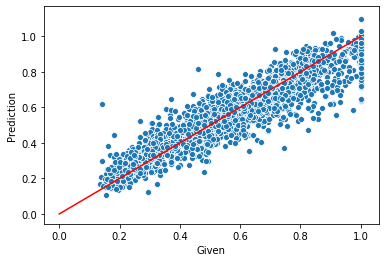

In [61]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,1,5)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [62]:
from sklearn.ensemble import AdaBoostRegressor as ABR
ABR=ABR(base_estimator=GBR)
ABR.fit(x_train,y_train)
y_pred=ABR.predict(x_test)
train_pred=ABR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(GBR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.8492256036997088
rscore for training data: 0.8529190817580561
Cross val score: [0.82671844 0.82619309 0.83671575 0.82340811 0.83352572 0.82754764
 0.83681525 0.8111572  0.82819403 0.84116054]
Mean cv: 0.829143576332994


In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.06205326747056426
Mean absolute error of train data: 0.06210148721955394
Mean squared error of test data: 0.0811938241812968
Mean squared error of train data: 0.07957129620652517


In [64]:
calihouse=pd.DataFrame({'Actual house values':y_test,'Predicted house values':y_pred})

In [65]:
calihouse

,Actual house values,Predicted house values
13548,0.671479,0.571970
12643,0.513045,0.566470
6892,0.333771,0.401315
5254,1.000000,0.843667
3756,0.973499,0.789924
2318,0.178342,0.221164
5163,0.474159,0.541433
15510,0.307745,0.415617
10793,0.639030,0.597629
191,0.446606,0.523206


In [66]:
calihouse.to_csv('project13_predictions.csv')

In [67]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [68]:
joblib.dump(ABR,'Project13_ABR.pkl')

['Project13_ABR.pkl']